In [1]:
import igraph as ig 

In [2]:
n_humans=50
g = ig.Graph(n=n_humans, directed=True)
g.vs['bot']= [0 for n in range(n_humans)]
g.vs['label']= [n for n in range(n_humans)] #this is the uid

In [3]:
# Make a network such that nodes with index 0, 10, 20, etc. are center of stars 
# stars are joined by connected 2 vertices on the peripheral (9, 19, etc.)
edges = []
for cluster_id in range(int(n_humans/10)):
    for i in range(10): 
        if i%10!=0:
            edges += [(i+cluster_id*10, 0+cluster_id*10)] 
            #for the first cluster add (1,0), (2,0), etc. For second add (11,0), (12,0)
            
edges +=[(9,19), (19,29), (29,39), (39,49)]

In [4]:
g.add_edges(edges)

In [5]:
g.write_gml('synthetic_humannet.gml')

In [58]:
degrees = g.degree([node for node in g.vs], mode='in')

(array([41.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

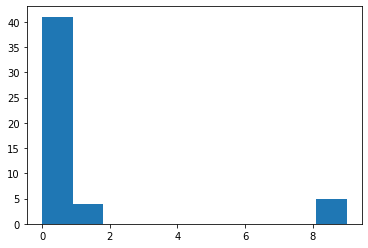

In [59]:
import matplotlib.pyplot as plt

plt.hist(degrees)

## Run simulation

In [61]:
from infosys.ig_InfoSys import InfoSystem
import infosys.utils as utils
import infosys.ig_utils as ig_utils
import json
import numpy as np 
import copy
from collections import defaultdict

In [71]:
hub_specs = {
        "targeting_criterion": "hubs",
        "human_network": 'synthetic_humannet.gml',
#         "human_network": None, #DEBUG
        "n_humans": 50,
        "beta": 0.1,
        "gamma": 0.1,
        "verbose": True,
    }

none_specs = {
        "targeting_criterion": None,
        "human_network": 'synthetic_humannet.gml',
#         "human_network": None, #DEBUG
        "n_humans": 50,
        "beta": 0.1,
        "gamma": 0.1,
        "verbose": True,
    }

infosys_specs = {
    "trackmeme": True,
    "tracktimestep": True,
    "track_forgotten": True,
    "verbose": True,
    "epsilon": 0.001, #TODO: change back to 0.001
    "mu": 0.5,
    "phi": 1,
    "alpha": 15,
}

In [72]:
def run_simulation(net_specs, infosys_specs, strategy_name='hub'):
    G = ig_utils.init_net(**net_specs)
    
    human_network = '%s_network.gml' %strategy_name
    G.write_gml(human_network)
    
    print("Create InfoSystem instance..")
    follower_sys = InfoSystem(human_network, **infosys_specs)
    
    print("Start simulation ..")
    verbose_results = follower_sys.simulation()
    
    results = {'quality': verbose_results['quality'],
               'diversity': verbose_results['diversity'],
               'discriminative_pow': verbose_results['discriminative_pow']
    }
    print(" ** Average quality: %s - diversity: %s - tau: %s (p=%s)" %(results['quality'], results['diversity'], 
    results['discriminative_pow'][0], results['discriminative_pow'][1]))
    
    return verbose_results

## hub

In [73]:
hub_verbose = run_simulation(hub_specs, infosys_specs, strategy_name='hub')

Reading human network...
File:  synthetic_humannet.gml
Generating bot network...
Merging human and bot networks...
Humans following bots...
Create InfoSystem instance..
Tracking forgotten memes
IGRAPH D--- 55 90 -- 
+ attr: bot (v), id (v), uid (v)
Graph Avg in deg 1.64
Start simulation ..
time_step = 0, q = 1, diff = 1, unique/human memes = 0/0, all memes created=0
time_step = 1, q = 0.8022009732478655, diff = 0.19779902675213445, unique/human memes = 27/750, all memes created=30
time_step = 2, q = 0.6667646626836335, diff = 0.16883089784333213, unique/human memes = 60/750, all memes created=40
time_step = 3, q = 0.5893525783124351, diff = 0.11610106039457115, unique/human memes = 86/750, all memes created=51
time_step = 4, q = 0.47148206264994813, diff = 0.19999999999999998, unique/human memes = 114/750, all memes created=55
time_step = 5, q = 0.4524364295346452, diff = 0.04039524432437077, unique/human memes = 146/750, all memes created=72
time_step = 6, q = 0.4447664154377114, diff

time_step = 67, q = 0.10570004388728611, diff = 0.19999999999999998, unique/human memes = 1855/750, all memes created=90
time_step = 68, q = 0.08544547551704855, diff = 0.19162308382611595, unique/human memes = 1875/750, all memes created=90
time_step = 69, q = 0.09173353229740938, diff = 0.07359145399227375, unique/human memes = 1907/750, all memes created=90
time_step = 70, q = 0.07790599354875392, diff = 0.15073592395663105, unique/human memes = 1933/750, all memes created=90
time_step = 71, q = 0.07280864557041643, diff = 0.06542947141990497, unique/human memes = 1963/750, all memes created=90
time_step = 72, q = 0.08170368963257532, diff = 0.12217016251945118, unique/human memes = 2000/750, all memes created=90
time_step = 73, q = 0.08289065151563615, diff = 0.014527641143241473, unique/human memes = 2026/750, all memes created=90
time_step = 74, q = 0.13922689823147644, diff = 0.6796453603119917, unique/human memes = 2056/750, all memes created=90
time_step = 75, q = 0.1790196518

/var/folders/yc/9r4mxr9x4xjfl8r3q6jj171c0000gq/T/ipykernel_37713/534780927.py:5: RuntimeWarning: A boolean vertex attribute was converted to numeric at src/io/gml.c:715
  G.write_gml(human_network)


time_step = 97, q = 0.07426227390076069, diff = 0.9904663307378972, unique/human memes = 2685/750, all memes created=90
time_step = 98, q = 0.14198878578582502, diff = 0.9119908175121283, unique/human memes = 2718/750, all memes created=90
 ** Average quality: 0.14200929104749194 - diversity: 2.5557880516153926 - tau: 0.6883582914628742 (p=0.0)


## None

In [74]:
none_verbose = run_simulation(none_specs, infosys_specs, strategy_name='none')

Reading human network...
File:  synthetic_humannet.gml
Generating bot network...
Merging human and bot networks...
Humans following bots...
Create InfoSystem instance..
Tracking forgotten memes
IGRAPH D--- 55 88 -- 
+ attr: bot (v), id (v), uid (v)
Graph Avg in deg 1.6
Start simulation ..
time_step = 0, q = 1, diff = 1, unique/human memes = 0/0, all memes created=0
time_step = 1, q = 0.8130478743264622, diff = 0.1869521256735378, unique/human memes = 29/750, all memes created=25
time_step = 2, q = 0.6836144800112236, diff = 0.15919529267875232, unique/human memes = 56/750, all memes created=36
time_step = 3, q = 0.5490230021522531, diff = 0.19688213429411383, unique/human memes = 82/750, all memes created=51
time_step = 4, q = 0.4516783615198363, diff = 0.17730521353533654, unique/human memes = 107/750, all memes created=59
time_step = 5, q = 0.3641020224782259, diff = 0.19389093324490453, unique/human memes = 133/750, all memes created=74
time_step = 6, q = 0.3998560388427533, diff = 

/var/folders/yc/9r4mxr9x4xjfl8r3q6jj171c0000gq/T/ipykernel_37713/534780927.py:5: RuntimeWarning: A boolean vertex attribute was converted to numeric at src/io/gml.c:715
  G.write_gml(human_network)


# Analysis plots

In [ ]:
net = ig.Graph.Read_GML('../data/follower_network.gml')

# Check Twitter network

In [75]:
hubnet = ig.Graph.Read_GML('hub_network.gml')
nonenet = ig.Graph.Read_GML('none_network.gml')

In [95]:
bots = [node for node in hubnet.vs if node['bot']==1]

In [96]:
bots

[igraph.Vertex(<igraph.Graph object at 0x105c297c0>, 50, {'id': 50.0, 'bot': 1.0, 'uid': '0h'}),
 igraph.Vertex(<igraph.Graph object at 0x105c297c0>, 51, {'id': 51.0, 'bot': 1.0, 'uid': '1k'}),
 igraph.Vertex(<igraph.Graph object at 0x105c297c0>, 52, {'id': 52.0, 'bot': 1.0, 'uid': '2m'}),
 igraph.Vertex(<igraph.Graph object at 0x105c297c0>, 53, {'id': 53.0, 'bot': 1.0, 'uid': '3p'}),
 igraph.Vertex(<igraph.Graph object at 0x105c297c0>, 54, {'id': 54.0, 'bot': 1.0, 'uid': '4i'})]

In [97]:
# check bot followers
for bot in bots:
    follower_idxs = [node for node in hubnet.predecessors(bot)]
    print(follower_idxs)

[0, 10, 20, 30, 40, 51, 52, 53, 54]
[0, 10, 19, 20, 29, 30, 39, 40, 49, 50, 52, 53, 54, 54]
[10, 20, 49, 50, 51, 53]
[0, 10, 29, 30]
[0, 10, 19, 20, 30, 39, 40, 49]


In [101]:
hum_memes= [meme for meme in hub_verbose['all_memes'] if meme['is_by_bot']==0]
len(hum_memes)

2491

In [102]:
bot_memes= [meme for meme in hub_verbose['all_memes'] if meme['is_by_bot']==1]
len(bot_memes)

258

In [105]:
# Plot degree dist. of nodes spreading bot memes 
spreading_nodes = []
for meme in bot_memes:
    spreading_nodes += meme['spread_via_agents']

In [107]:
spreading_degs = hubnet.degree(spreading_nodes, mode='in')

(array([1424.,    0.,   81.,    0.,   92.,  107.,  259.,    0.,    0.,
         106.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

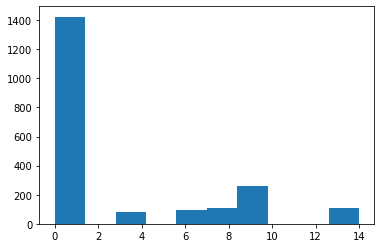

In [108]:
plt.hist(spreading_degs)

In [98]:
hub_verbose

{'quality': 0.14200929104749194,
 'diversity': 2.5557880516153926,
 'discriminative_pow': (0.6883582914628742, 0.0),
 'quality_timestep': [1,
  0.8022009732478655,
  0.6667646626836335,
  0.5893525783124351,
  0.47148206264994813,
  0.4524364295346452,
  0.4447664154377114,
  0.35581313235016915,
  0.3108316489626162,
  0.24968146934097826,
  0.29736322803579646,
  0.2905937544210706,
  0.3577195265691856,
  0.29603176360430977,
  0.23682541088344783,
  0.1916236285785828,
  0.34030281695732534,
  0.2722422535658603,
  0.2906345957846857,
  0.23250767662774857,
  0.256201247844007,
  0.2049609982752056,
  0.16776304034136252,
  0.13421043227309,
  0.10736834581847202,
  0.08589467665477762,
  0.12962440547237078,
  0.12429461319196819,
  0.11991913912594132,
  0.12659603605570194,
  0.12370594353241736,
  0.10080507269292262,
  0.16120467702544466,
  0.18207223441003337,
  0.18186446144956026,
  0.17244934586932503,
  0.13895295692509751,
  0.11116236554007802,
  0.11230401456987311,
 

In [118]:
def deg_nodes_spreading_botmemes(net, verbose):
    fig,axs = plt.subplots(1,2, sharex=True, sharey=True)
    bot_memes= [meme for meme in verbose['all_memes'] if meme['is_by_bot']==1]
    hum_memes= [meme for meme in verbose['all_memes'] if meme['is_by_bot']==0]
    # Plot degree dist. of nodes spreading bot memes 
    bot_spreading_nodes = []
    for meme in bot_memes:
        bot_spreading_nodes += meme['spread_via_agents']
    bot_spreading_degs = net.degree(bot_spreading_nodes, mode='in')
    
    hum_spreading_nodes = []
    for meme in hum_memes:
        hum_spreading_nodes += meme['spread_via_agents']
    hum_spreading_degs = net.degree(hum_spreading_nodes, mode='in')
    
    axs[0].hist(bot_spreading_degs, label='bot', color='orange')
    axs[1].hist(hum_spreading_degs, label='human')
    fig.legend()
#     axs[0].set_title('deg dis of node spreading bot memes')
#     axs[1].set_title('deg dis of node spreading human memes')
    fig.show()
    

In [ ]:
def spreading_bot(net, verbose):
    bot_memes= [meme for meme in verbose['all_memes'] if meme['is_by_bot']==1]
    spreading_nodes = []
    for meme in bot_memes:
        spreading_nodes += meme['spread_via_agents']
    
    spreading_uids=[net.vs[nodeidx]['uid'] for nodeidx in spreading_nodes]
    spreading_bots = []
    for uid in spreading_uids:
        spreading_bots+=[1] if any(c.isalpha() for c in uid) else [0]
    return spreading_bots

In [151]:
def is_bot_uid(uid_str):
    return True if any(c.isalpha() for c in uid_str) else False

In [152]:
def deg_of_nodes_spreading_memes(net, verbose, meme_type='bot', agent_type='bot'):
    # meme_type = ['bot', 'human'], 
    # agent_type = ['bot', 'human', 'all']
    if meme_type=='bot':
        memes= [meme for meme in verbose['all_memes'] if meme['is_by_bot']==1]
    else: 
        memes= [meme for meme in verbose['all_memes'] if meme['is_by_bot']==0]
    
    spreading_nodes = []
    for meme in memes:
        spreading_nodes += meme['spread_via_agents']
    
    spreading_uids=[net.vs[nodeidx]['uid'] for nodeidx in spreading_nodes]
    
    if agent_type=='bot':
        spreading_bots = [nodeidx for nodeidx in spreading_nodes if is_bot_uid(net.vs[nodeidx]['uid']) is True]
        spreading_nodes = spreading_bots
    if agent_type=='human':
        spreading_humans = [nodeidx for nodeidx in spreading_nodes if is_bot_uid(net.vs[nodeidx]['uid']) is False]
        spreading_nodes = spreading_bots
 
    spreading_degs = net.degree(spreading_nodes, mode='in')
    
    return spreading_degs

In [153]:
def plot_ccdf_deg_nodes_spreading_memes(nonenet, none_verbose, hubnet, hub_verbose, meme_type='bot',agent_type='bot'):
    figure, ax = plt.subplots()
    
#     ax.set_xscale('log')
#     ax.set_yscale('log')

    nonebot_spreading_degs = deg_of_nodes_spreading_memes(nonenet, none_verbose, meme_type=meme_type, agent_type=agent_type)
    hubbot_spreading_degs = deg_of_nodes_spreading_memes(hubnet, hub_verbose, meme_type=meme_type, agent_type=agent_type)
    
    sns.ecdfplot(ax=ax, data = nonebot_spreading_degs, complementary=True, label = 'none')
    sns.ecdfplot(ax=ax, data = hubbot_spreading_degs, complementary=True, label = 'hub')
    ax.set_xlabel("Spreading node degree")
    ax.legend()
    ax.set_title("CCDF: degree of %s nodes spreading %s memes" %(agent_type, meme_type))
    figure.show()
        
    

/var/folders/yc/9r4mxr9x4xjfl8r3q6jj171c0000gq/T/ipykernel_37713/2689878980.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


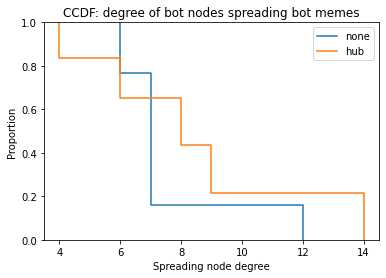

In [154]:
plot_ccdf_deg_nodes_spreading_memes(nonenet, none_verbose, hubnet, hub_verbose, meme_type='bot')

In [ ]:
plot_ccdf_deg_nodes_spreading_memes(nonenet, none_verbose, hubnet, hub_verbose, meme_type='bot')

/var/folders/yc/9r4mxr9x4xjfl8r3q6jj171c0000gq/T/ipykernel_37713/2191123069.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


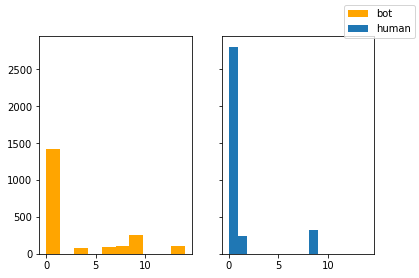

In [119]:
deg_nodes_spreading_botmemes(hubnet, hub_verbose)

/var/folders/yc/9r4mxr9x4xjfl8r3q6jj171c0000gq/T/ipykernel_37713/2191123069.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


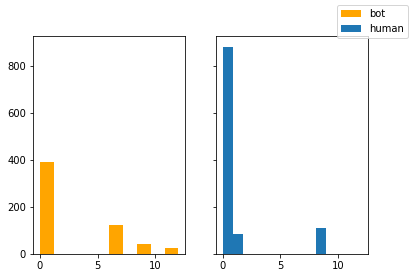

In [120]:
deg_nodes_spreading_botmemes(nonenet, none_verbose)

In [123]:
# plot human meme quality 
def human_meme_quality(none_verbose, hub_verbose):
    figure, ax = plt.subplots()
#     ax.set_xscale('log')
#     ax.set_yscale('log')

    hub_memes= [meme for meme in hub_verbose['all_memes'] if meme['is_by_bot']==0]
    hubmeme_quality = [meme['quality'] for meme in hub_memes]
    
    none_memes= [meme for meme in none_verbose['all_memes'] if meme['is_by_bot']==0]
    nonememe_quality = [meme['quality'] for meme in none_memes]
    
    sns.ecdfplot(ax=ax, data = nonememe_quality, complementary=True, label = 'none')
    sns.ecdfplot(ax=ax, data = hubmeme_quality, complementary=True, label = 'hub')
    ax.set_xlabel("Quality")
    ax.legend()
    ax.set_title("CCDF: Quality of human memes")
    figure.show()

/var/folders/yc/9r4mxr9x4xjfl8r3q6jj171c0000gq/T/ipykernel_37713/3388758029.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


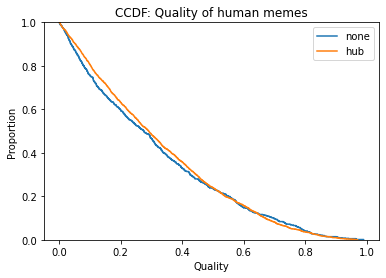

In [124]:
human_meme_quality(none_verbose, hub_verbose)

## Degree of bots 

In [128]:
# Degree of bots 
hubbots = [node for node in hubnet.vs if node['bot']==1]
hub_bot_degs = hubnet.degree(hubbots, mode='in')
hub_bot_degs

[9, 14, 6, 4, 8]

In [129]:
# Degree of bots 
nonebots = [node for node in nonenet.vs if node['bot']==1]
none_bot_degs = nonenet.degree(nonebots, mode='in')
none_bot_degs

[12, 7, 6, 7, 7]

## memes spreading through bots 
The bots seems to become hubs & play a big role in spreading in either case

In [130]:
bot_memes= [meme for meme in hub_verbose['all_memes'] if meme['is_by_bot']==1]

In [131]:
spreading_nodes = []
for meme in bot_memes:
    spreading_nodes += meme['spread_via_agents']

In [134]:
spreading_uids=[hubnet.vs[nodeidx]['uid'] for nodeidx in spreading_nodes]

In [139]:
spreading_bots = []
for uid in spreading_uids:
    spreading_bots+=[1] if any(c.isalpha() for c in uid) else [0]

(array([1574.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         495.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

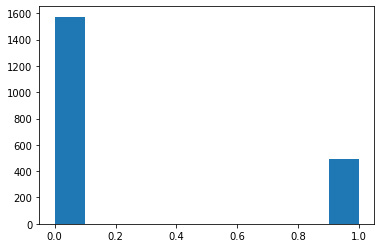

In [140]:
plt.hist(spreading_bots)

In [141]:
def spreading_bot(net, verbose):
    bot_memes= [meme for meme in verbose['all_memes'] if meme['is_by_bot']==1]
    spreading_nodes = []
    for meme in bot_memes:
        spreading_nodes += meme['spread_via_agents']
    
    spreading_uids=[net.vs[nodeidx]['uid'] for nodeidx in spreading_nodes]
    spreading_bots = []
    for uid in spreading_uids:
        spreading_bots+=[1] if any(c.isalpha() for c in uid) else [0]
    return spreading_bots

In [142]:
# plot human meme quality 
def spreading_by_bot(nonenet, none_verbose, hubnet, hub_verbose):
    figure, ax = plt.subplots()
#     ax.set_xscale('log')
#     ax.set_yscale('log')

    hub_botspread = spreading_bot(hubnet, hub_verbose)
    
    none_botspread = spreading_bot(nonenet, none_verbose)
    
    sns.ecdfplot(ax=ax, data = none_botspread, complementary=True, label = 'none')
    sns.ecdfplot(ax=ax, data = hub_botspread, complementary=True, label = 'hub')
    ax.set_xlabel("Bot or not")
    ax.legend()
    ax.set_title("CCDF: Nodes spreading bot memes")
    figure.show()

/var/folders/yc/9r4mxr9x4xjfl8r3q6jj171c0000gq/T/ipykernel_37713/3744872265.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


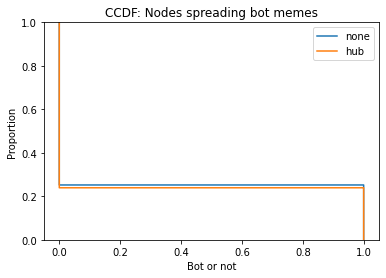

In [143]:
spreading_by_bot(nonenet, none_verbose, hubnet, hub_verbose)

In [151]:
def is_bot_uid(uid_str):
    return True if any(c.isalpha() for c in uid_str) else False

In [156]:
def deg_of_nodes_spreading_memes(net, verbose, meme_type='bot', agent_type='bot'):
    # meme_type = ['bot', 'human'], 
    # agent_type = ['bot', 'human', 'all']
    if meme_type=='bot':
        memes= [meme for meme in verbose['all_memes'] if meme['is_by_bot']==1]
    else: 
        memes= [meme for meme in verbose['all_memes'] if meme['is_by_bot']==0]
    
    spreading_nodes = []
    for meme in memes:
        spreading_nodes += meme['spread_via_agents']
    
    spreading_uids=[net.vs[nodeidx]['uid'] for nodeidx in spreading_nodes]
    
    if agent_type=='bot':
        spreading_bots = [nodeidx for nodeidx in spreading_nodes if is_bot_uid(net.vs[nodeidx]['uid']) is True]
        spreading_nodes = spreading_bots
    if agent_type=='human':
        spreading_humans = [nodeidx for nodeidx in spreading_nodes if is_bot_uid(net.vs[nodeidx]['uid']) is False]
        spreading_nodes = spreading_humans
 
    spreading_degs = net.degree(spreading_nodes, mode='in')
    
    return spreading_degs

In [157]:
def plot_ccdf_deg_nodes_spreading_memes(nonenet, none_verbose, hubnet, hub_verbose, meme_type='bot',agent_type='bot'):
    figure, ax = plt.subplots()
    
#     ax.set_xscale('log')
#     ax.set_yscale('log')

    nonebot_spreading_degs = deg_of_nodes_spreading_memes(nonenet, none_verbose, meme_type=meme_type, agent_type=agent_type)
    hubbot_spreading_degs = deg_of_nodes_spreading_memes(hubnet, hub_verbose, meme_type=meme_type, agent_type=agent_type)
    
    sns.ecdfplot(ax=ax, data = nonebot_spreading_degs, complementary=True, label = 'none')
    sns.ecdfplot(ax=ax, data = hubbot_spreading_degs, complementary=True, label = 'hub')
    ax.set_xlabel("Spreading node degree")
    ax.legend()
    ax.set_title("CCDF: degree of %s nodes spreading %s memes" %(agent_type, meme_type))
    figure.show()
        
    

/var/folders/yc/9r4mxr9x4xjfl8r3q6jj171c0000gq/T/ipykernel_37713/2689878980.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


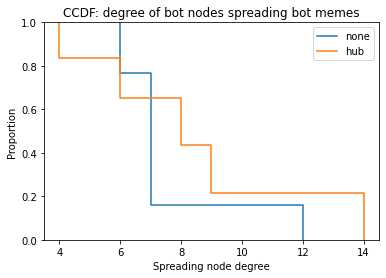

In [154]:
plot_ccdf_deg_nodes_spreading_memes(nonenet, none_verbose, hubnet, hub_verbose, meme_type='bot')

/var/folders/yc/9r4mxr9x4xjfl8r3q6jj171c0000gq/T/ipykernel_37713/2689878980.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


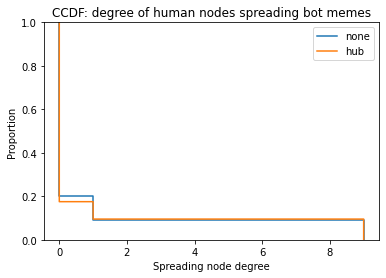

In [158]:
plot_ccdf_deg_nodes_spreading_memes(nonenet, none_verbose, hubnet, hub_verbose, meme_type='bot', agent_type='human')

## CCDF: Degree dist. of human following bots

In [79]:
def bot_followers(graph):
    # Get the indegree of all humans that follow bots
    bots = [node for node in graph.vs if node['bot']==1]
    humfollower_degs = []
    for bot in bots:
        follower_idxs = [node for node in graph.predecessors(bot)]
        hum_followers = [node for node in graph.vs if int(node['id']) in follower_idxs and node['bot']==0]
        humfollower_deg = graph.degree(hum_followers, mode='in')
        humfollower_degs += humfollower_deg
    return humfollower_degs


def deg_dist_human_following_bots(none_graph, hub_graph, plot_fpath=None):
    none_follower_degs = bot_followers(none_graph)
    hub_follower_degs = bot_followers(hub_graph)

    figure, ax = plt.subplots()
    ax.set_xscale('log')
    ax.set_yscale('log')
    sns.ecdfplot(ax=ax, data = none_follower_degs, complementary=True, label = 'no targeting')
    sns.ecdfplot(ax=ax, data = hub_follower_degs, complementary=True, label = 'targeting')
    ax.set_xlabel("Degree")
    ax.legend()
    ax.set_title("CCDF: Degree dist. of humans following bots")
    figure.tight_layout()
    if plot_fpath is not None:
        figure.savefig(plot_fpath, dpi=300)
        plt.close(figure)
    else:
        figure.show()

/Users/Shared/miniforge3/envs/graph/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/yc/9r4mxr9x4xjfl8r3q6jj171c0000gq/T/ipykernel_37713/3765825213.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


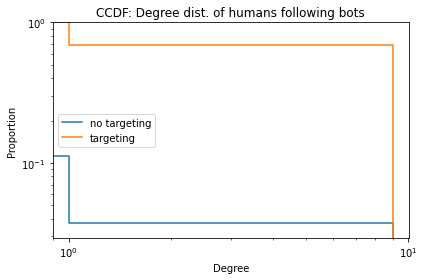

In [81]:
import seaborn as sns 
deg_dist_human_following_bots(nonenet, hubnet)

In [82]:
import memeinflux_analysis

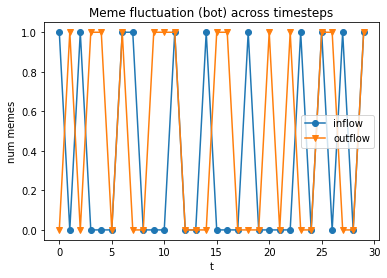

In [92]:
meme_type='bot'
memeinflux_analysis.memeflow_timestep(none_verbose['meme_netchange'], meme_type=meme_type,ylog=False)

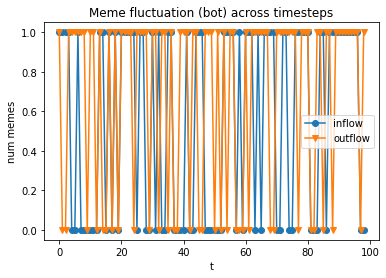

In [89]:
memeinflux_analysis.memeflow_timestep(hub_verbose['meme_netchange'], meme_type=meme_type, ylog=False)

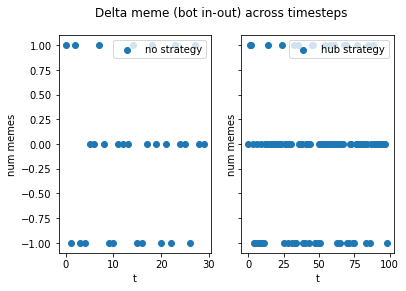

In [91]:

memeinflux_analysis.delta_flow_panel(none_verbose['meme_netchange'], hub_verbose['meme_netchange'],  meme_type1='bot', meme_type2='bot', 
                 label1='no strategy', label2='hub strategy')

/Users/baotruon/marketplace/exps/memeinflux_analysis.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


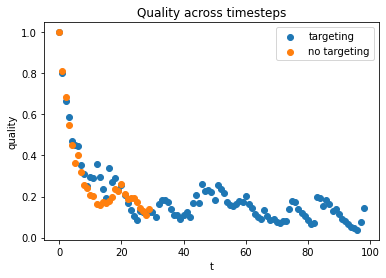

In [93]:
memeinflux_analysis.quality_timestep(none_verbose['quality_timestep'], hub_verbose['quality_timestep'])
        